# Kernel Recursive Least Squares (KRLS) & Kernel Least Mean Squares

Example: Time series prediction

In [71]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [93]:
num_data = 100

# AWGN
v = np.random.normal(0,1,num_data) 

# Initial conditions
d_true =[0.1 , 0.1]
d = [d_true[0] + v[0], d_true[1] + v[1]]

# Grab new data
new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
for i in range(2,num_data):
    new_d_true(d_true)
    d.append(d_true[-1] + v[i])

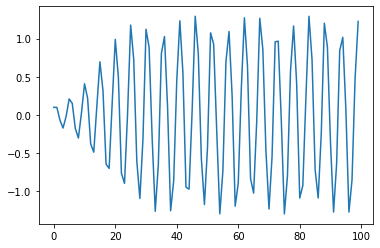

In [95]:
plt.plot(range(len(d_true)),d_true)

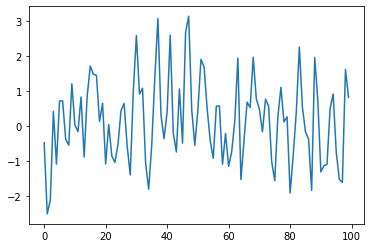

In [96]:
plt.plot(range(len(d)),d)

In [223]:
# KRLS

# Kernel Recursive Least Sqaures depends on a kernel functionin which to evaluate the points in a higher 
# dimension without needing to create and analyaze in the higher dimensional plane as this would create
# significant computing cost

# The use of kernel functions are valuable as they transform the data into another plane in which they become
# easy to evaluate

# for this demonstration we will be utilizing the guassian kernel function
# Kernel from Richard Paper

gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * ((np.linalg.norm(u_i - u_j))**2))
nmse = lambda D_n, Phi_n: np.sum((D_n - Phi_n)**2)

mse_KNLMS = []
step_size = 10e-1
reg_coeff = 10e-1
threshold = 0.05

h = [] # column vector

# Initialization
m = 1
alpha = np.array([[0]])
u = np.array([d[0],d[1]])

dictionary = np.array([u])
h = np.array([[gauss_kernel(u,dictionary)]])

for n in range(1, num_data):
    u_n = np.array([d[n-1],d[n]])
    d_n = np.array(d[n])

    if np.max([gauss_kernel(u_n,dictionary[j]) for j in range(len(dictionary))]) <= threshold:
        m += 1
        dictionary = np.append(dictionary, u_n, axis=0)
        h = np.array([gauss_kernel(u_n,dictionary[j]) for j in range(len(dictionary))])
        alpha = np.append(alpha, [[0]], axis=0)
        

    h = np.array([gauss_kernel(u_n,dictionary[j]) for j in range(len(dictionary))])
    alpha = np.append(alpha, alpha[-1] + (step_size/(reg_coeff + np.linalg.norm(h)**2))*(d - h @ alpha) @ h)

[-0.46953733 -2.50148023] -2.5014802340158218


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [224]:
u_n = np.array([d[n-1],d[n]])
u_n

array([-0.46953733, -2.50148023])

In [242]:
h = np.array([[gauss_kernel(u,dictionary)]])
h

array([[1.]])

In [243]:
h = np.append(h,[[1]], axis = 0)

In [244]:
h

array([[1.],
       [1.]])